In [7]:
using NPZ
using PyPlot, Statistics, Distributions
include("../src/function/extended_delta_map.jl")
include("../src/function/r_estimate_extended.jl")
include("../src/function/set_data_model.jl")
# set parameters
freq_bands = [40, 60, 140]
#freq_bands = [40, 50, 60, 68, 78, 89, 100, 119]
#freq_bands = [40, 50, 60, 68, 78, 89, 100, 119, 140, 166, 195, 235, 280, 337, 402]; #GHz
which_model = "s1"
r_input = 0.01
seed = 2
nside = 4
num_I = 2  
cov_mat_scal = npzread("../covariance_matrix/smoothing_cov_mat_scal.npy")
cov_mat_tens = npzread("../covariance_matrix/smoothing_cov_mat_tens.npy")
mask_path = "../mask_p06_Nside4.v2.fits"
mask = hp.read_map(mask_path);
N⁻¹_set = Matrix{Float64}[]  
m_set = Vector{Float64}[]  
r_est = 0.5

# definite SetParams and FitParams struct
set_params = SetParams(freq_bands, which_model, r_input, seed, nside, num_I, cov_mat_scal, cov_mat_tens, mask, m_set, N⁻¹_set)
fit_params = FitParams(-3, 1.5, 20.1, r_est);

In [8]:
set_num_I!(set_params)
set_N⁻¹!(set_params)
set_m_vec!(set_params);

sys:1: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 


In [9]:
iterative_minimization(set_params, fit_params)

Iteration 1: r = 0.0291824056397032, Likelihood = -5.448802179637429e6
delta_like = 1.0005448802179638e10
delta_r = 0.4708175943602968
Iteration 2: r = 0.015038118602268724, Likelihood = -5.448574790875428e6
delta_like = 227.3887620009482
delta_r = 0.014144287037434478
Iteration 3: r = 0.014296817087231684, Likelihood = -5.448531058725012e6
delta_like = 43.73215041682124
delta_r = 0.0007413015150370406
Iteration 4: r = 0.014249566262810431, Likelihood = -5.448527919623901e6
delta_like = 3.1391011103987694
delta_r = 4.725082442125217e-5
Iteration 5: r = 0.014249566262810431, Likelihood = -5.448527682201644e6
delta_like = 0.23742225673049688
delta_r = 0.0
Iteration 6: r = 0.014249566262810431, Likelihood = -5.448527678885135e6
delta_like = 0.003316509537398815
delta_r = 0.0


In [10]:
num_seeds = 10
@time r_dis, beta_s_dis, beta_d_dis, T_d_dis = estimate_r_distribution(set_params, fit_params, num_seeds)

Iteration 1: r = 0.005534805481649585, Likelihood = -5.177562136287318e6
delta_like = 1.0005177562136288e10
delta_r = 0.008714760781160846
Iteration 2: r = 0.005304062260181042, Likelihood = -5.177527098916697e6
delta_like = 35.037370620295405
delta_r = 0.00023074322146854342
Iteration 3: r = 0.005304062260181042, Likelihood = -5.177525669420287e6
delta_like = 1.4294964103028178
delta_r = 0.0
Iteration 4: r = 0.005304062260181042, Likelihood = -5.177525666977042e6
delta_like = 0.002443244680762291
delta_r = 0.0
Iteration 1: r = 0.014249566262810431, Likelihood = -5.448527678885135e6
delta_like = 1.0005448527678885e10
delta_r = 0.0
Iteration 2: r = 0.014249566262810431, Likelihood = -5.448527678885135e6
delta_like = 0.0
delta_r = 0.0
Iteration 1: r = 0.007630919273353909, Likelihood = -5.00772195348871e6
delta_like = 1.000500772195349e10
delta_r = 0.0066186469894565225
Iteration 2: r = 0.007417531098966645, Likelihood = -5.007688462530374e6
delta_like = 33.49095833674073
delta_r = 0.000

(Any[0.005304062260181042, 0.014249566262810431, 0.007417573309794201, 0.011550311407165115, 0.013865979838147524, 0.014044258546651145, 0.010063370661548776, 0.012412628722411834, 0.008370350533590531, 0.009220039066296482], Any[-3.2790857387792482, -3.213296163182089, -3.1682954319411896, -3.191721823676531, -3.209684023378102, -3.103855199423175, -3.1482855471961457, -3.180178707953971, -3.0943120687158467, -3.142446534259179], Any[1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5], Any[20.1, 20.1, 20.1, 20.1, 20.1, 20.1, 20.1, 20.1, 20.1, 20.1])

sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


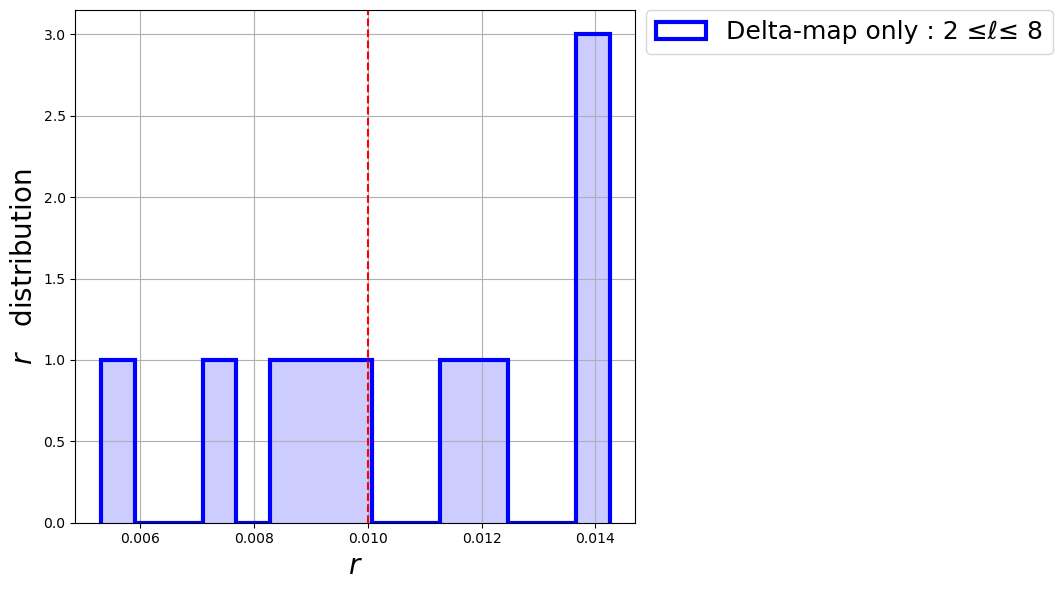

In [11]:
figure(figsize=(8, 6))
hist(r_dis, bins=15, alpha=0.2, color="blue", histtype="stepfilled")
hist(r_dis, bins = 15, alpha = 1., edgecolor = "blue", label = "Delta-map only : 2 ≤ℓ≤ 8", histtype = "step", linewidth = 3)
axvline(x = r_input, color = "red", linestyle = "--")
xlabel(L"$r$", fontsize=20)
ylabel(L"$r\quad$distribution", fontsize=20) 
plt.grid(true)
legend(loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0., fontsize="18")
tight_layout()
subplots_adjust(right=0.8)
show()

In [12]:
mean(r_dis)

0.010649814060859708